In [19]:
import pylab as pl

import re
import pylab as pl
import numpy as np
from datetime import datetime, timedelta

import subprocess

import os

In [21]:
def str2datetime(s):
    parts = s.split('.')
    dt = datetime.strptime(parts[0], "%Y-%m-%d %H:%M:%S")
    return dt.replace(microsecond=int(parts[1]))


def remove_outliers(x, outlierConstant = 1.5):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    removedList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
        else:
            removedList.append(y)
    return (resultList, removedList)


In [3]:
experiment = 'exp_3c8n'

In [4]:
os.system('cat exp_3c8n_cli/remote/*/log/stderr | python3 ../thr_hist.py --plot')

[595, 581, 584, 584, 552, 573, 569, 559, 568, 562, 566, 568, 580, 583, 583, 564, 558, 554, 559, 569, 546, 558, 578, 593, 570, 563, 568, 552, 565, 575, 570, 589, 567, 564, 553, 568, 565, 569, 569, 563, 550, 572, 596, 585, 584, 590, 587, 590, 568, 573, 566, 564, 555, 580, 569, 568, 585, 588, 586, 555, 578, 564, 599, 583, 562, 576, 570, 576, 565, 572, 575, 406]
lat = 913.334ms
lat = 917.613ms
values are  [595, 581, 584, 584, 552, 573, 569, 559, 568, 562, 566, 568, 580, 583, 583, 564, 558, 554, 559, 569, 546, 558, 578, 593, 570, 563, 568, 552, 565, 575, 570, 589, 567, 564, 553, 568, 565, 569, 569, 563, 550, 572, 596, 585, 584, 590, 587, 590, 568, 573, 566, 564, 555, 580, 569, 568, 585, 588, 586, 555, 578, 564, 599, 583, 562, 576, 570, 576, 565, 572, 575, 406]
Figure(640x480)


0

In [17]:
def getThroughput(experiment):

    result = subprocess.check_output('cat '+experiment+'_cli/remote/*/log/stderr', shell=True)


    result = result.decode("utf-8") 

    lines = result.split('\n')

    commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')

    Times = []
    lats = []

    for line in lines:
        m = commit_pat.match(line)
        if m:
            time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
            float((line.split(' ')[1]).split(':')[2])
            Times.append(time_item)        

            lats.append(float(m.group(2)))


    begin_time = None
    values = []
    interval = 1
    cnt = 0
    Times.sort()
    for timestamp in Times:
        if begin_time is None:
            begin_time = timestamp
            next_begin_time = timestamp +interval

        while timestamp >= next_begin_time:
            begin_time = next_begin_time
            next_begin_time += interval
            values.append(cnt)
            cnt = 0
        cnt += 1
    values.append(cnt)
    
    lats, _ = remove_outliers(lats)
#     print(len(values))


    return np.arange(len(values))*interval,np.array(values)/interval, lats

In [6]:



experiment = 'exp_2c12n'
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))


experiment = 'exp_3c8n'
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))



experiment = 'exp_4c6n'
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))


experiment = 'exp_6c4n'
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))

316.1666666666667 1.1011429624909943
569.3472222222222 0.9176126490461048
932.986301369863 0.7447344171879653
1392.876712328767 0.6340480358340163


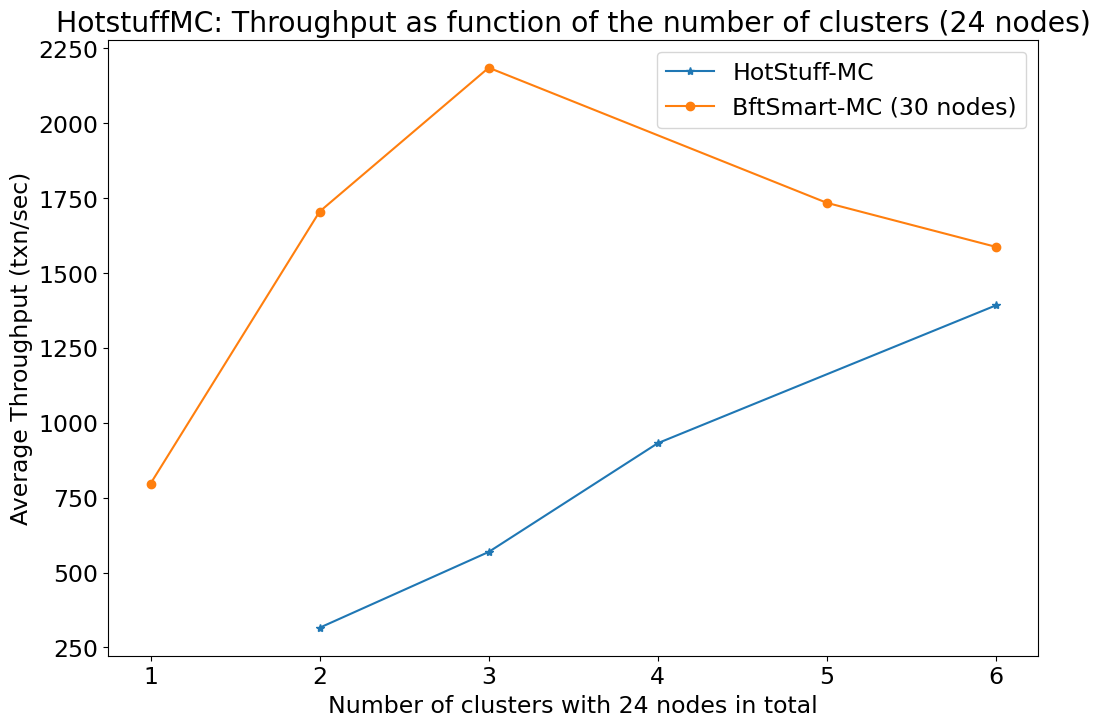

<Figure size 640x480 with 0 Axes>

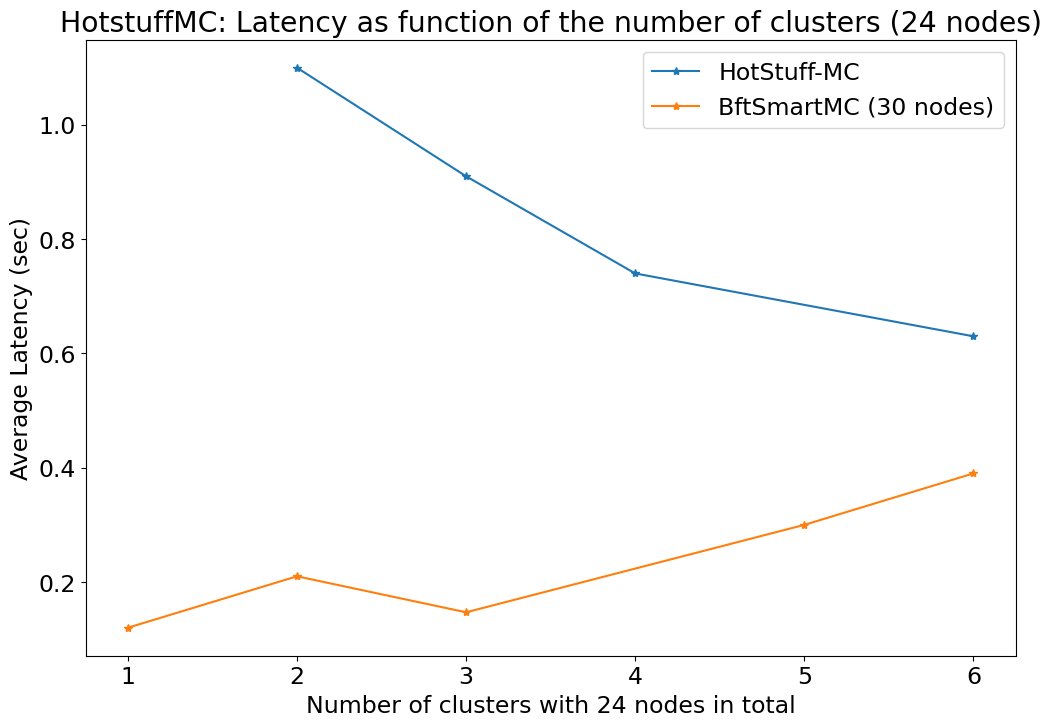

<Figure size 640x480 with 0 Axes>

In [13]:
clusters = [2, 3, 4, 6]
throughputs = [316, 569, 932, 1392] 
latencies = [1.10, 0.91, 0.74, 0.63]



resDB_fig1_nclusters = [1, 2, 3, 5, 6]

bftsmartMC_fig1_tput_100C = [797, 1705, 2185, 1734, 1587]
bftsmartMC_fig1_lat_100C = [0.12, 0.21, 0.147, 0.30, 0.39]


bftsmart_fig1_tput_100C = [610, 1426, 1857, 1557, 2028]
bftsmart_fig1_lat_100C = [0.168, 0.14, 0.163, 0.33, 0.29]



fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(clusters, throughputs, '-*', label ='HotStuff-MC')
pl.plot(resDB_fig1_nclusters, bftsmartMC_fig1_tput_100C, '-o', label ='BftSmart-MC (30 nodes)')
pl.xlabel('Number of clusters with 24 nodes in total')
pl.ylabel('Average Throughput (txn/sec)')
pl.title('HotstuffMC: Throughput as function of the number of clusters (24 nodes)')
pl.legend()
pl.show()
pl.clf()


fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(clusters, latencies, '-*', label ='HotStuff-MC')
pl.plot(resDB_fig1_nclusters, bftsmartMC_fig1_lat_100C, '-*', label='BftSmartMC (30 nodes)')
pl.xlabel('Number of clusters with 24 nodes in total')
pl.ylabel('Average Latency (sec)')
pl.legend()
pl.title('HotstuffMC: Latency as function of the number of clusters (24 nodes)')
pl.show()
pl.clf()






# fig = pl.figure(figsize = (12, 8))
# fig.patch.set_facecolor('white')

# # pl.plot(resDB_fig1_nclusters, bftsmart_fig1_tput_100C, '-o', label ='BftSmart 100C')
# pl.title('BftSmart: Throughput as function of the number of clusters (30 nodes)')
# pl.xlabel('Number of Clusters (nz=30)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# pl.show()
# pl.clf()



# fig = pl.figure(figsize = (12, 8))
# fig.patch.set_facecolor('white')
# pl.plot(resDB_fig1_nclusters, bftsmartMC_fig1_lat_100C, '-*', label='BftSmartMC')
# # pl.plot(resDB_fig1_nclusters, bftsmart_fig1_lat_100C, '-*', label='BftSmart')

# pl.xlabel('Number of clusters with 24 nodes in total')
# pl.ylabel('Average Latency (sec)')
# pl.title('BftSmart: Latency as function of the number of clusters (30 nodes)')
# pl.show()
# pl.clf()


In [8]:
experiment = 'exp_4c4n'
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))



experiment = 'exp_4c5n'
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))

experiment = 'exp_4c6n'
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))




experiment = 'exp_4c7n'
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))


1319.3333333333333 0.5039982859343707
1089.3150684931506 0.6359859835773166
932.986301369863 0.7447344171879653
757.5616438356165 0.9061619386170954


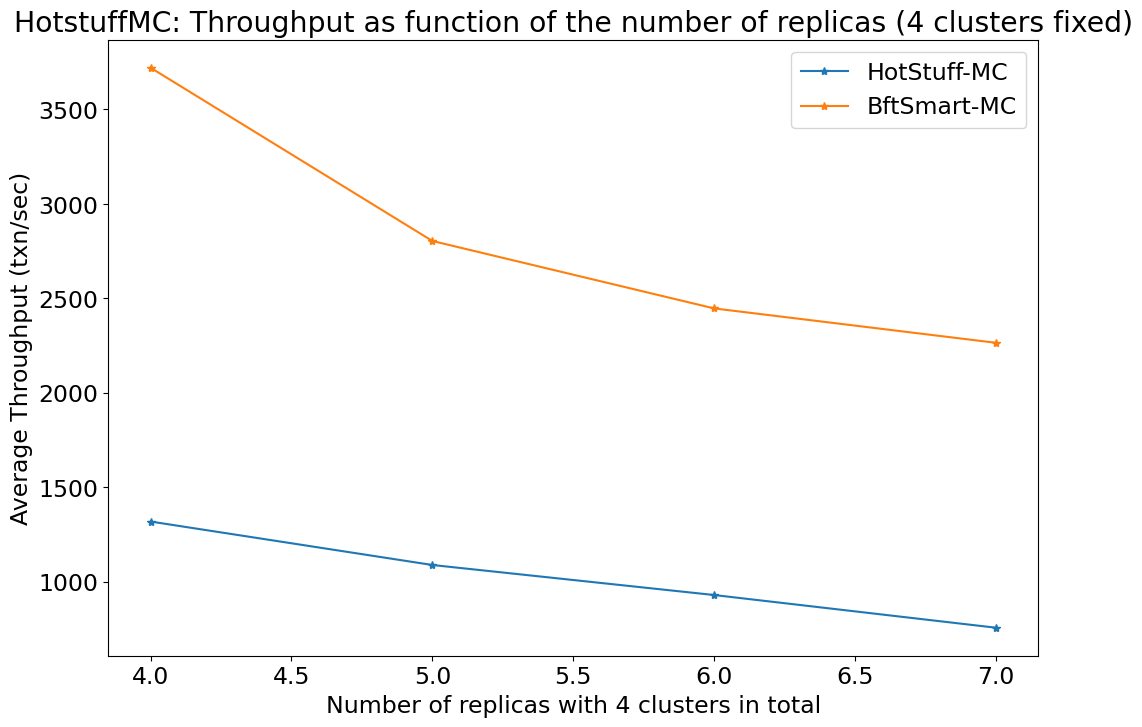

<Figure size 640x480 with 0 Axes>

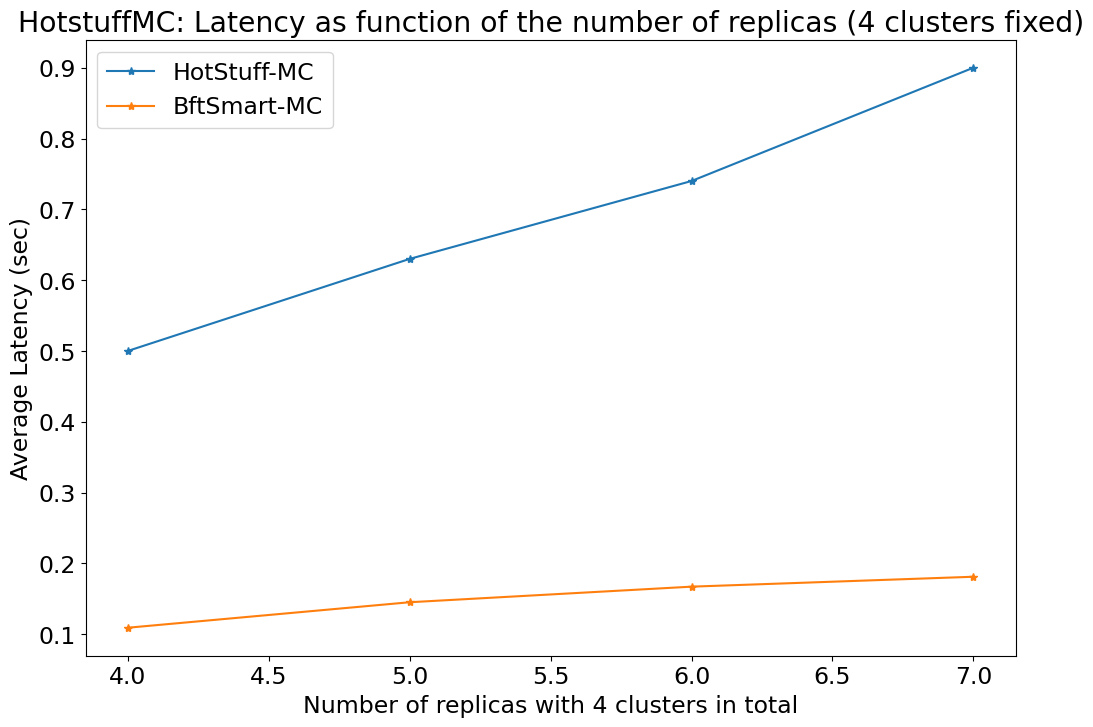

<Figure size 640x480 with 0 Axes>

In [14]:
replicas = [4, 5, 6, 7]
throughputs = [1319, 1089, 930, 757] 
latencies = [0.50, 0.63, 0.74, 0.90]


nreplicas = [4, 5, 6, 7]


BftSmart_MC_fig3_tput_100C = [3721, 2804, 2447, 2265]
BftSmart_MC_fig3_lat_100C = [0.109, 0.145, 0.167, 0.181]


fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(replicas, throughputs, '-*', label = 'HotStuff-MC')
pl.plot(nreplicas, BftSmart_MC_fig3_tput_100C, '-*', label = 'BftSmart-MC')

pl.xlabel('Number of replicas with 4 clusters in total')
pl.ylabel('Average Throughput (txn/sec)')
pl.title('HotstuffMC: Throughput as function of the number of replicas (4 clusters fixed)')
pl.legend()

pl.show()
pl.clf()


fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(replicas, latencies, '-*', label = 'HotStuff-MC')
pl.plot(nreplicas, BftSmart_MC_fig3_lat_100C, '-*', label = 'BftSmart-MC')
pl.legend()

pl.xlabel('Number of replicas with 4 clusters in total')
pl.ylabel('Average Latency (sec)')
pl.title('HotstuffMC: Latency as function of the number of replicas (4 clusters fixed)')
pl.show()
pl.clf()



In [15]:
# experiment = 'exp_j1'
# X,Y, lats = getThroughput(experiment)
# print(np.sum(Y)/len(Y), np.average(lats))

# fig = pl.figure(figsize = (12, 8))
# fig.patch.set_facecolor('white')
# pl.plot(X,Y)
# pl.axvline(x=30.48, ls='--', color = 'red')
# pl.xlabel('Times in Seconds (s)')
# pl.ylabel('HotstuffMC: Throughput in Transactions per second (TPS)')
# pl.title('1 Node joining a 3 cluster with 15 nodes')
# # pl.savefig('/home/tejas/Desktop/HotstuffJoinOps.png', dpi = 150)
# pl.show()
# pl.clf()

1138.6216216216217 0.4468066237967033


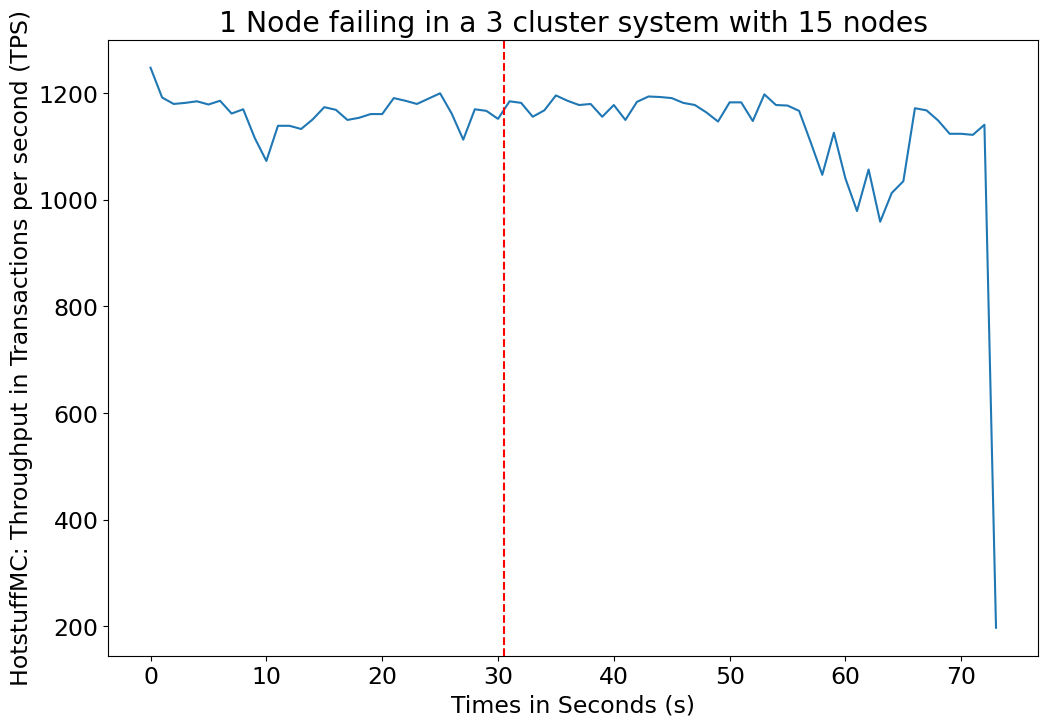

<Figure size 640x480 with 0 Axes>

In [22]:
experiment = 'exp_f1'
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))

fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(X,Y)
pl.axvline(x=30.48, ls='--', color = 'red')
pl.xlabel('Times in Seconds (s)')
pl.ylabel('Throughput in Transactions per second (TPS)')
pl.title('HotStuffMC:1 Node failing in a 3 cluster system with 15 nodes')
# pl.savefig('/home/tejas/Desktop/HotstuffJoinOps.png', dpi = 150)
pl.show()
pl.clf()

In [7]:
from PIL import Image
import pylab as pl
import numpy as np
img = (Image.open('/home/tejas/Desktop/3NodesJoiningHotstuffMC.png'))

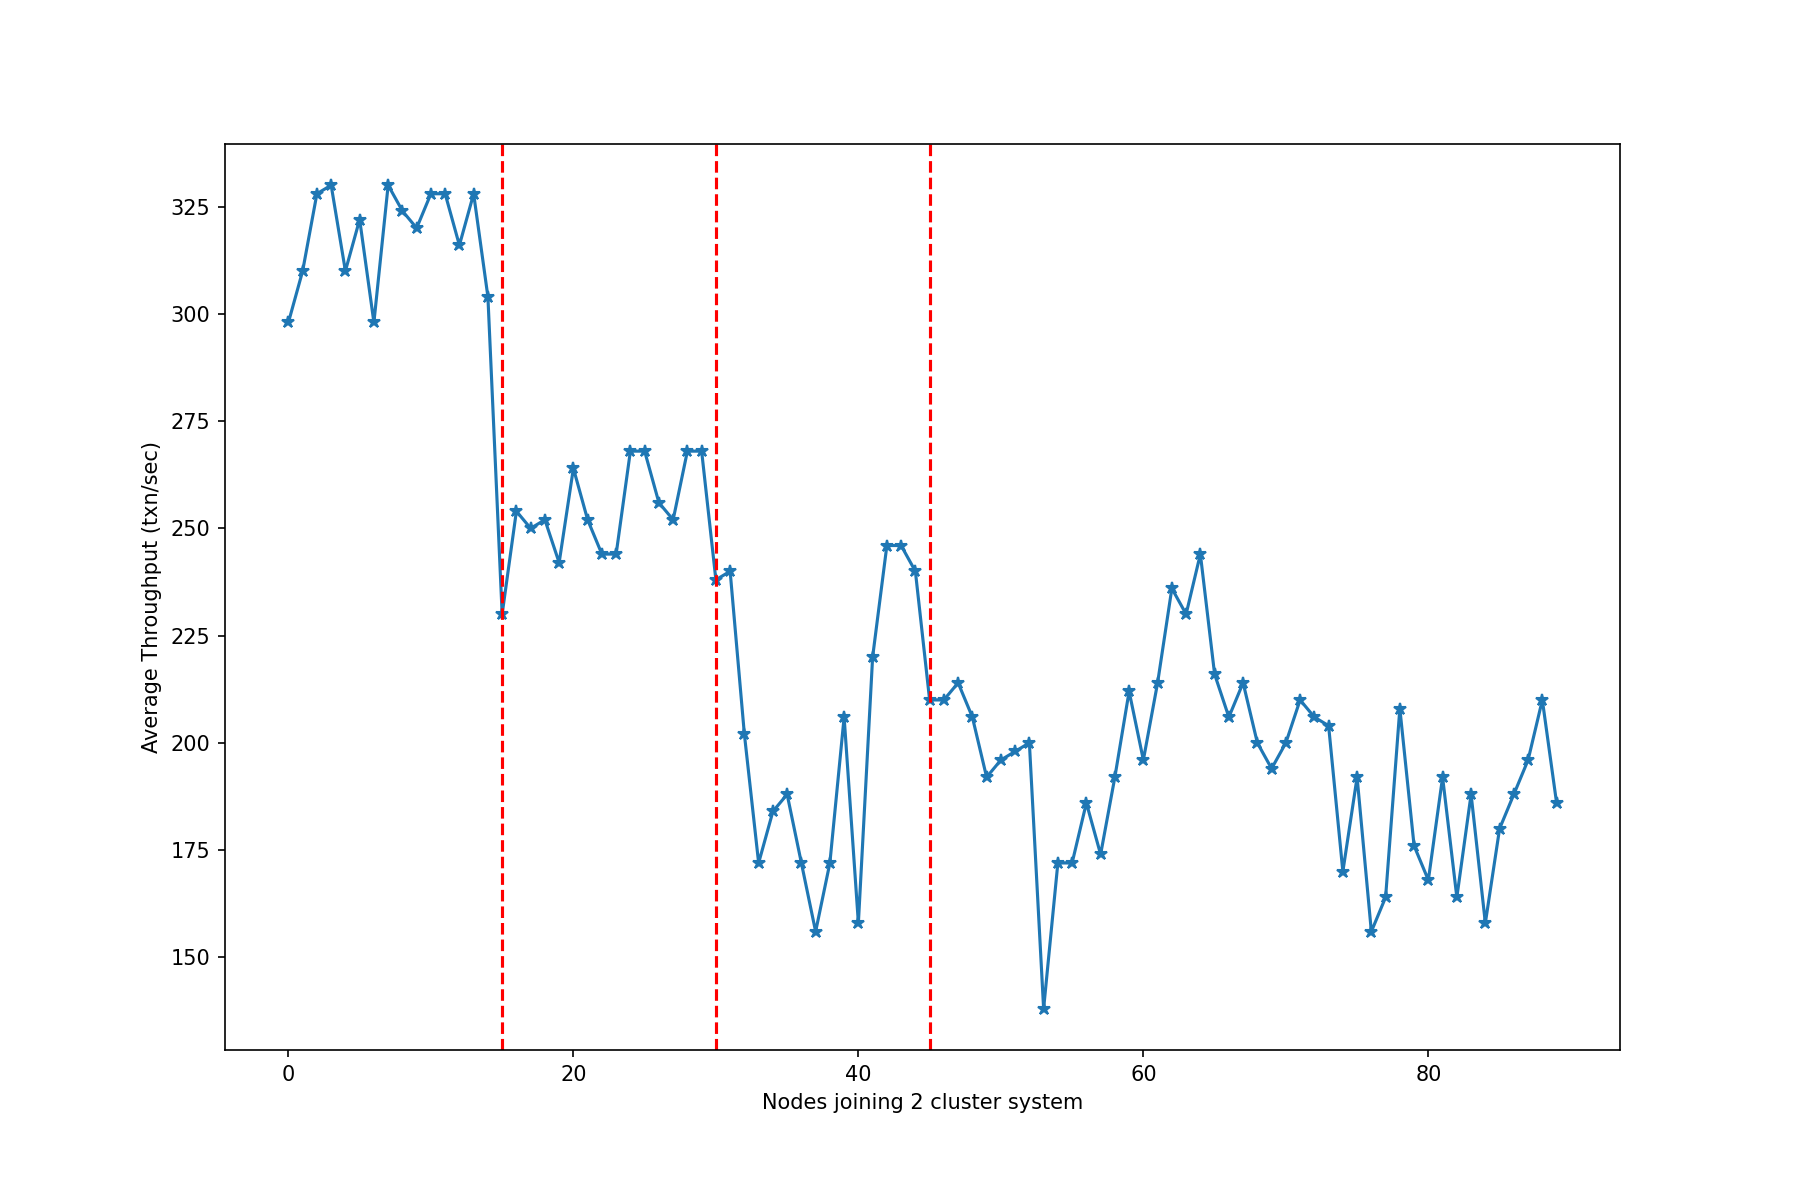

In [8]:
img

In [3]:
from PIL import Image
import pylab as pl
import numpy as np
img = (Image.open('/home/tejas/Desktop/remote_view_change.png'))

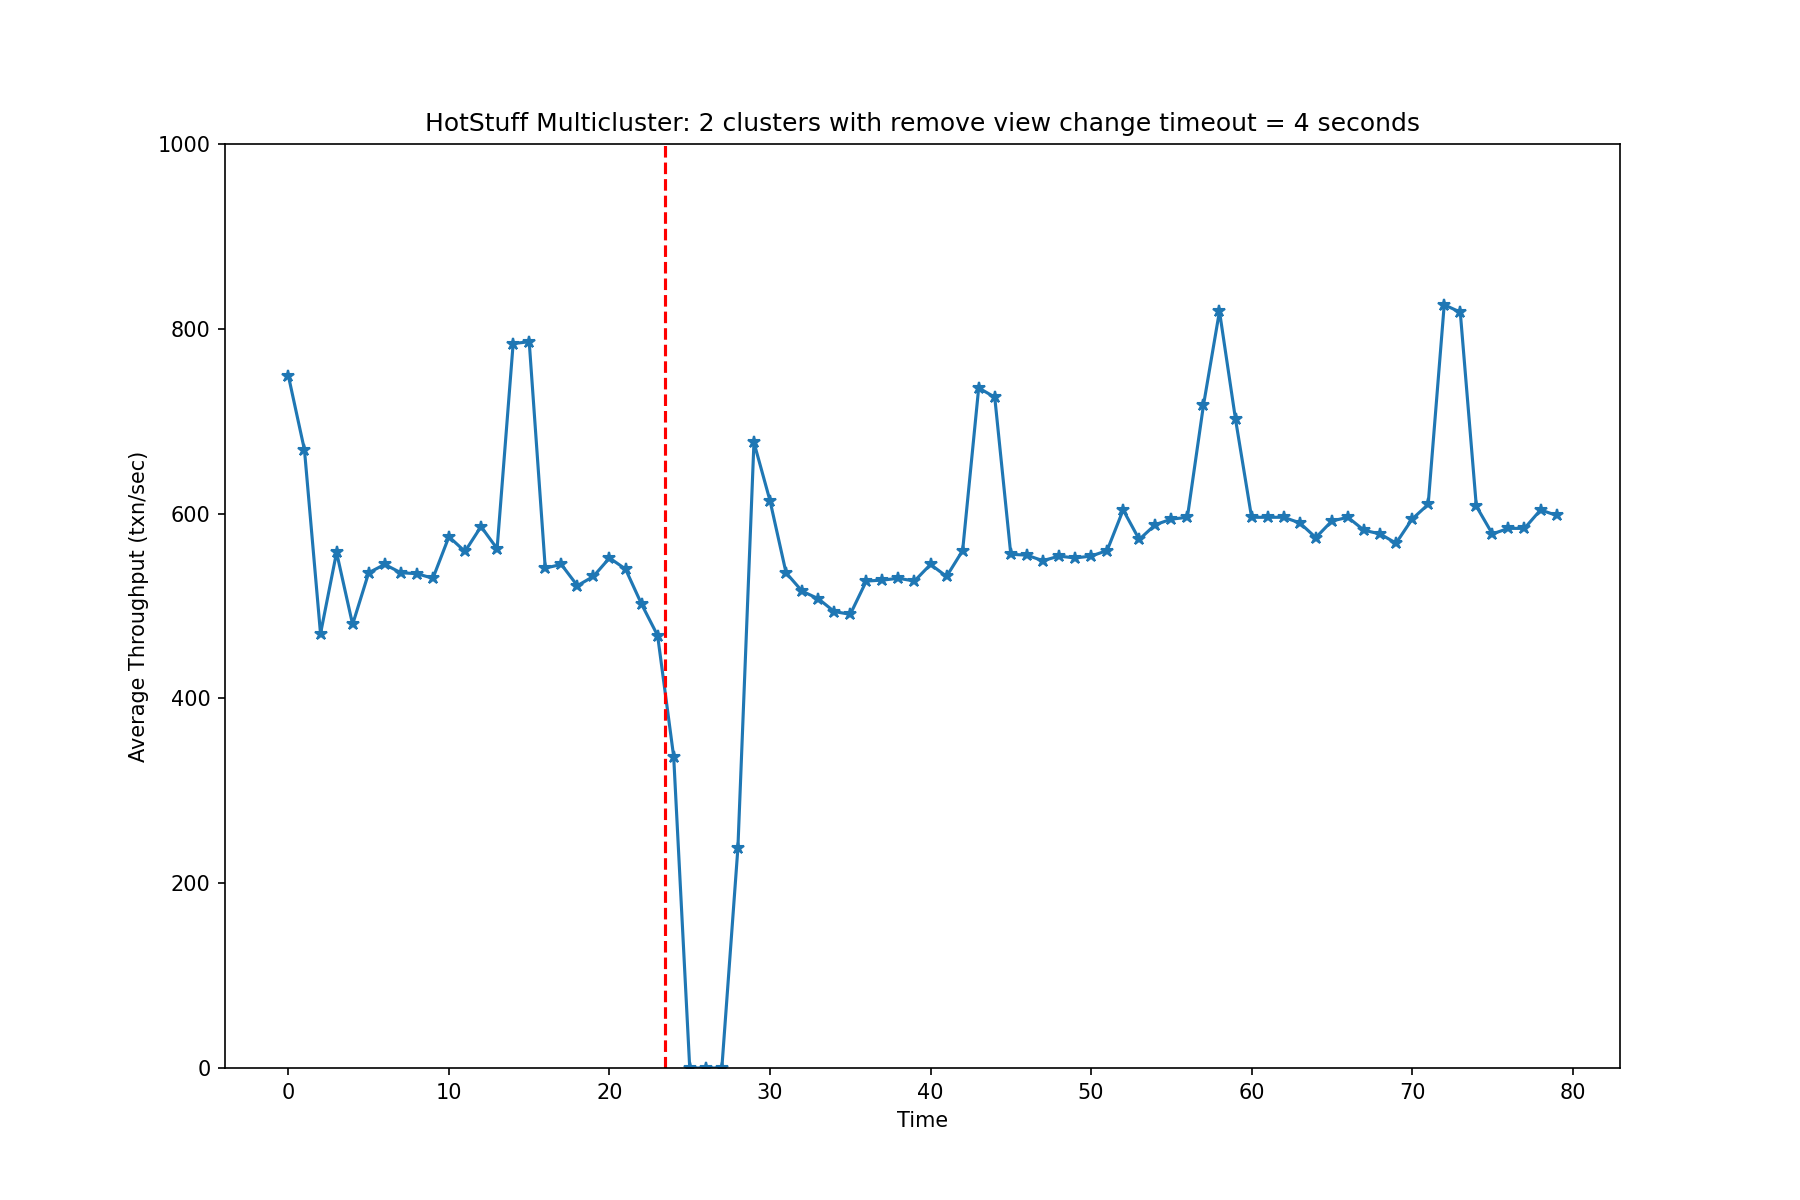

In [4]:
img